## Name - Gaurang Vivek Sonkavde

## Class - M.Tech AI-ML

## PRN Number - 21070149023 

## Subject - Unsupervised Learning

# 4) Apply and analyze the value of K in K-Means Clustering Algorithm

### Import Libraries and Dataset

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
from  sklearn.preprocessing import StandardScaler

In [5]:
data=pd.read_csv(r'C:\Users\gaura\OneDrive\Desktop\DataSets\iris.csv')

In [6]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df=data.drop(['Id','Species'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Identify Co-relations

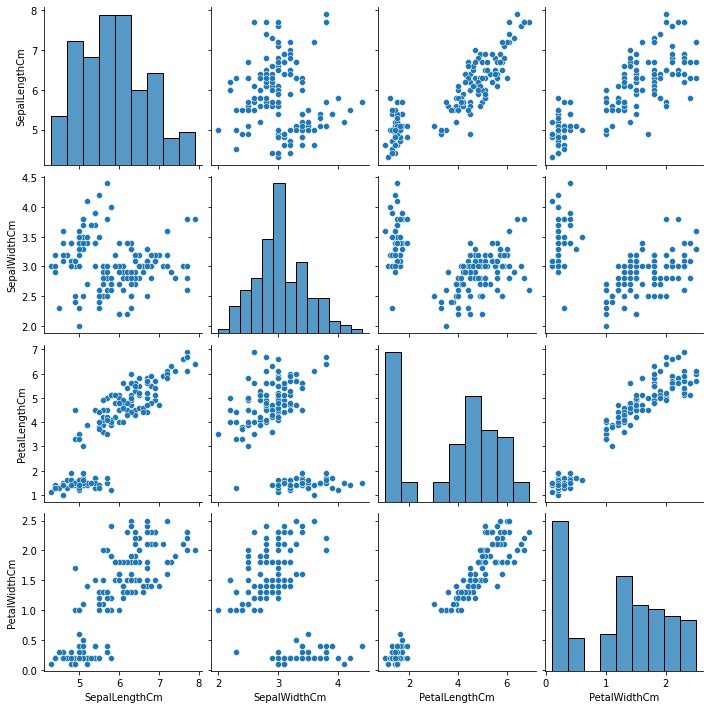

In [9]:
sns.pairplot(df)

<AxesSubplot:>

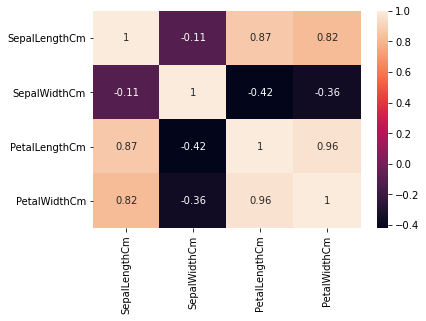

In [10]:
sns.heatmap(df.corr(),annot=True)

### Standard Scalling

In [5]:
scaler=StandardScaler()
df_sd=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_sd


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [6]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_sd[['SepalLengthCm','PetalLengthCm']])
    sse.append(km.inertia_)

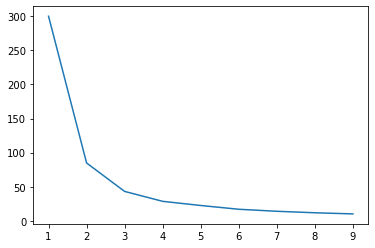

In [7]:
plt.plot(k_range,sse)

### Identify Cluster and use Elbow Method

In [8]:
model=KMeans(n_clusters=3)
df_pred=model.fit_predict(df_sd[['SepalLengthCm','PetalLengthCm']])
df_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2])

In [9]:
df_sd['cluster']=df_pred

In [10]:
final_df=df_sd.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

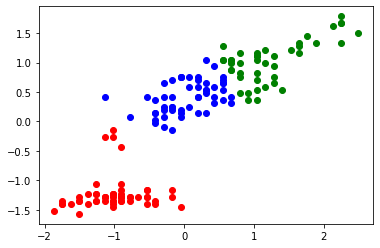

In [11]:
df1=final_df[final_df['cluster']==0]
df2=final_df[final_df['cluster']==1]
df3=final_df[final_df['cluster']==2]

plt.scatter(df1['SepalLengthCm'],df1['PetalLengthCm'],color='r')
plt.scatter(df2['SepalLengthCm'],df2['PetalLengthCm'],color='g')
plt.scatter(df3['SepalLengthCm'],df3['PetalLengthCm'],color='b')


In [12]:
k_range=range(1,10)
sse_2=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_sd[['SepalLengthCm','PetalLengthCm','SepalWidthCm','PetalWidthCm']])
    sse_2.append(km.inertia_)

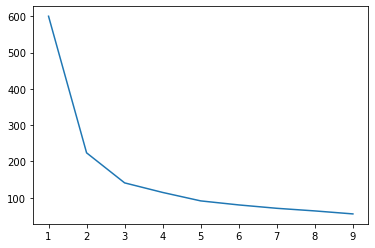

In [13]:
plt.plot(k_range,sse_2)

In [14]:
model_2=KMeans(n_clusters=3)
df_pred_2=model_2.fit_predict(df_sd[['SepalLengthCm','PetalLengthCm','SepalWidthCm','PetalWidthCm']])
df_pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [15]:
df_sd['cluster']=df_pred_2

In [16]:
df_sd

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,1
148,0.432165,0.800654,0.933356,1.447956,1


# Use Customer.csv dataset

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from  sklearn.preprocessing import StandardScaler

In [18]:
data=pd.read_csv(r'C:\Users\gaura\OneDrive\Desktop\DataSets\Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
new_data=data.iloc[:,3:]
new_data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [20]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(new_data[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

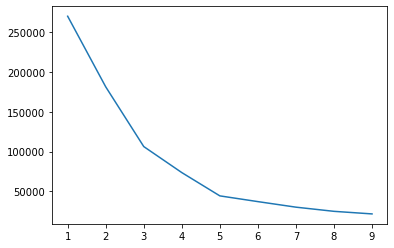

In [21]:
plt.plot(k_range,sse)

In [22]:
model=KMeans(n_clusters=5)
df_pred=model.fit_predict(new_data[['Annual Income (k$)','Spending Score (1-100)']])
df_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [23]:
new_data['cluster']=df_pred
new_data

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


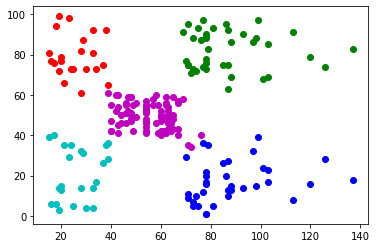

In [24]:
df1=new_data[new_data['cluster']==0]
df2=new_data[new_data['cluster']==1]
df3=new_data[new_data['cluster']==2]
df4=new_data[new_data['cluster']==3]
df5=new_data[new_data['cluster']==4]


plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='r')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='g')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='b')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='c')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='m')
